In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.isnull().sum().sum()

np.int64(0)

In [9]:
df.duplicated().sum()

np.int64(0)

<Axes: >

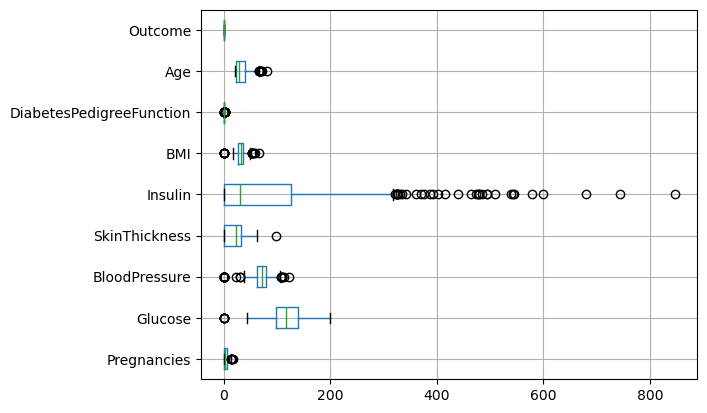

In [10]:
df.boxplot(vert=False)

In [11]:
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    Lower_Extreme=Q1-1.5*IQR
    Upper_Extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x: Lower_Extreme if x<Lower_Extreme else Upper_Extreme if x>Upper_Extreme else x)
for col in df.select_dtypes(['int','float']).columns: 
    outlier_capping(df,col)

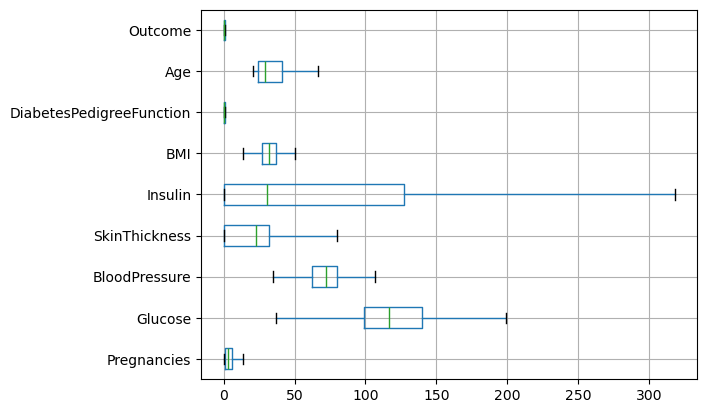

In [12]:
df.boxplot(vert=False)
plt.show()

In [13]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128987,0.184307,-0.084349,-0.077793,0.024681,-0.017398,0.549695,0.220392
Glucose,0.128987,1.000000,0.197865,0.059806,0.315856,0.235542,0.120213,0.269056,0.479158
BloodPressure,0.184307,0.197865,1.000000,0.152644,0.050080,0.282544,0.038793,0.304208,0.113301
SkinThickness,-0.084349,0.059806,0.152644,1.000000,0.488101,0.401494,0.177920,-0.119170,0.073125
Insulin,-0.077793,0.315856,0.050080,0.488101,1.000000,0.209665,0.190087,-0.065547,0.124721
BMI,0.024681,0.235542,0.282544,0.401494,0.209665,1.000000,0.141087,0.043375,0.309739
DiabetesPedigreeFunction,-0.017398,0.120213,0.038793,0.177920,0.190087,0.141087,1.000000,0.047289,0.184969
Age,0.549695,0.269056,0.304208,-0.119170,-0.065547,0.043375,0.047289,1.000000,0.242702
Outcome,0.220392,0.479158,0.113301,0.073125,0.124721,0.309739,0.184969,0.242702,1.000000


In [16]:
Y=df['Outcome']
X=df.drop(columns=['Outcome'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0


In [18]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [19]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X,Y)

C:\Users\mouni\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
df['Y_pred']=model.predict(X)
df['Y_pred']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    0
767    0
Name: Y_pred, Length: 768, dtype: int64

In [21]:
model.coef_

array([[ 1.41685462e-01,  3.49507510e-02, -1.90737684e-02,
        -6.62867439e-03, -1.08754021e-03,  8.72064499e-02,
         1.90749568e+00,  1.16411052e-02]])

In [24]:
model.intercept_


array([-8.09179447])

In [25]:
df["predict_proba"] = model.predict_proba(X)[:,1:]

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y,df["Y_pred"]) 
print("confusion matrix",'\n',cm)
score = accuracy_score(Y,df["Y_pred"])
print("Accuracy score: ", np.round(score,3))

confusion matrix 
 [[440  60]
 [110 158]]
Accuracy score:  0.779


In [27]:

from sklearn.metrics import recall_score,precision_score,f1_score
r_score = recall_score(Y,df["Y_pred"])
print("Sensitivity score: ", np.round(r_score,3))
sp_score = recall_score(df["Y_pred"],Y)
print("specificity score: ", np.round(sp_score,3))
p_score = precision_score(Y,df["Y_pred"])
print("Precision score: ", np.round(p_score,3))
f1_score = f1_score(Y,df["Y_pred"])
print("F1 score: ", np.round(f1_score,3))

Sensitivity score:  0.59
specificity score:  0.725
Precision score:  0.725
F1 score:  0.65


In [28]:
from sklearn.metrics import roc_curve,roc_auc_score
tpr,fpr,dummy = roc_curve(Y,df["predict_proba"])

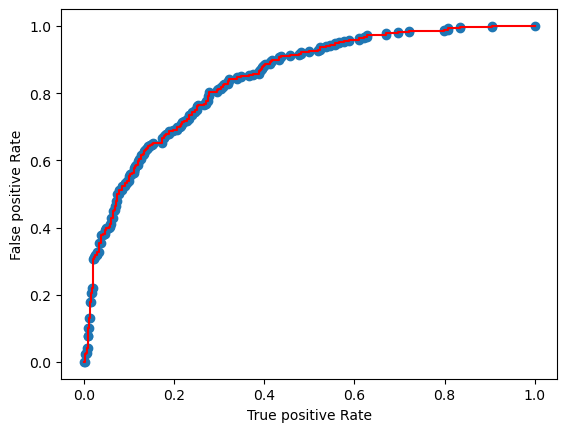

In [29]:
import matplotlib.pyplot as plt
plt.scatter(tpr,fpr)
plt.plot(tpr,fpr,color='red')
plt.xlabel("True positive Rate")
plt.ylabel("False positive Rate")
plt.show()

In [30]:
auc_score = roc_auc_score(Y,df["predict_proba"])
print("AUC score: ", np.round(auc_score,3))

AUC score:  0.84


In [31]:
model.coef_

array([[ 1.41685462e-01,  3.49507510e-02, -1.90737684e-02,
        -6.62867439e-03, -1.08754021e-03,  8.72064499e-02,
         1.90749568e+00,  1.16411052e-02]])

In [32]:
model.intercept_

array([-8.09179447])